***

# **`single variable classification`**

***

In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.optimize as opt 

In [18]:
path = 'D:\\dldb\\ha\\ex3data.txt' 
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Accepted']) 
print('data = ') 
print(data.head(10) ) 
print('======================================')  
print('data.describe = ') 
print(data.describe()) 

data = 
      Exam 1     Exam 2  Accepted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1
data.describe = 
           Exam 1      Exam 2    Accepted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


In [19]:
# y=1عن y=0 فصل البيانات عند
positive = data[data['Accepted'].isin([1])] 
negative = data[data['Accepted'].isin([0])] 
print('Accepted students = \n',positive)
print('======================================') 
print('Accepted students = \n',negative)

Accepted students = 
        Exam 1     Exam 2  Accepted
3   60.182599  86.308552         1
4   79.032736  75.344376         1
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
12  82.307053  76.481963         1
13  69.364589  97.718692         1
15  53.971052  89.207350         1
16  69.070144  52.740470         1
18  70.661510  92.927138         1
19  76.978784  47.575964         1
21  89.676776  65.799366         1
24  77.924091  68.972360         1
25  62.271014  69.954458         1
26  80.190181  44.821629         1
30  61.379289  72.807887         1
31  85.404519  57.051984         1
33  52.045405  69.432860         1
37  64.176989  80.908061         1
40  83.902394  56.308046         1
42  94.443368  65.568922         1
46  77.193035  70.458200         1
47  97.771599  86.727822         1
48  62.073064  96.768824         1
49  91.564974  88.696293         1
50  79.944818  74.163119         

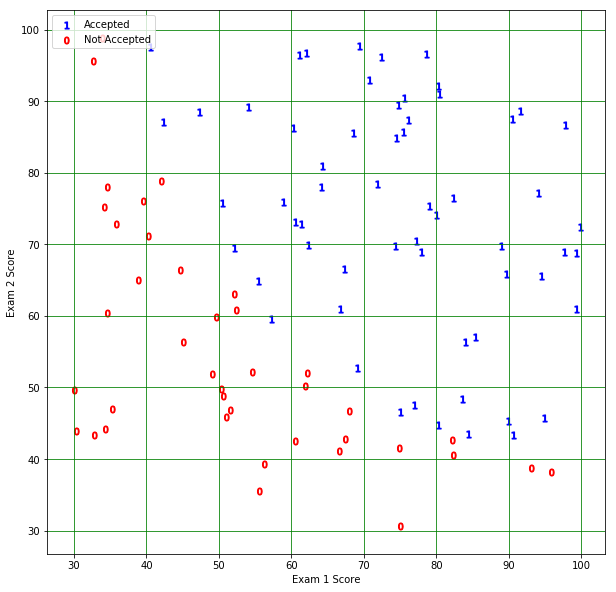

In [20]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='$1$', label='Accepted') 
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='$0$', label='Not Accepted') 
ax.legend(loc='upper left') 
ax.grid(color='g', linestyle='solid')
ax.set_xlabel('Exam 1 Score') 
ax.set_ylabel('Exam 2 Score') 
plt.show()

In [21]:
def sigmoid(z): 
 return 1 / (1 + np.exp(-z)) 

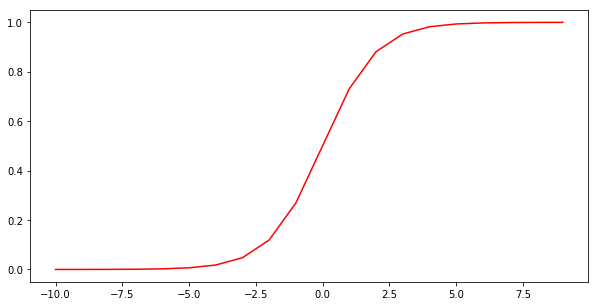

In [22]:
nums = np.arange(-10, 10, step=1) 
fig, ax = plt.subplots(figsize=(10,5)) 
ax.plot(nums, sigmoid(nums), 'r') 

***

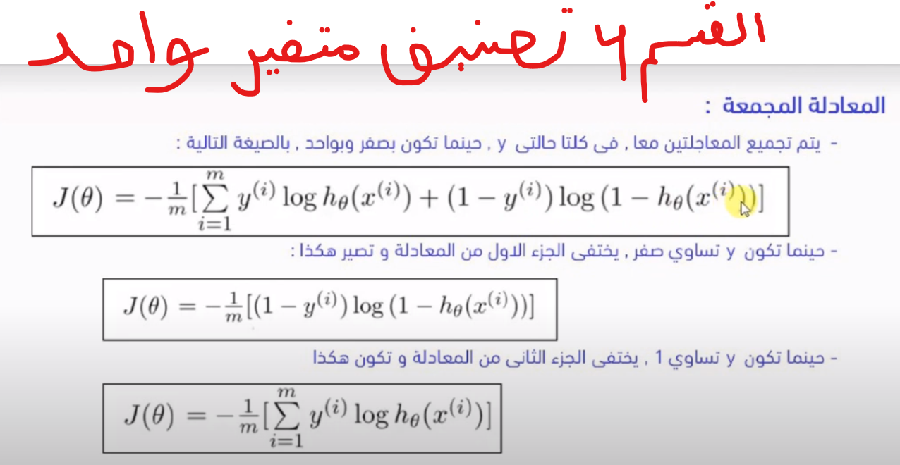

***

In [23]:
def cost(theta, X, y): 
    theta = np.matrix(theta) 
    X = np.matrix(X) 
    y = np.matrix(y) 
    first = np.multiply(-y, np.log(sigmoid(X * theta.T))) 
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T))) 
    return np.sum(first - second) / (len(X)) 

In [24]:
# add a ones column - this makes the matrix multiplication work out easier 
data.insert(0, 'Ones', 1) 
print('new data = \n',data)

new data = 
     Ones     Exam 1     Exam 2  Accepted
0      1  34.623660  78.024693         0
1      1  30.286711  43.894998         0
2      1  35.847409  72.902198         0
3      1  60.182599  86.308552         1
4      1  79.032736  75.344376         1
..   ...        ...        ...       ...
95     1  83.489163  48.380286         1
96     1  42.261701  87.103851         1
97     1  99.315009  68.775409         1
98     1  55.340018  64.931938         1
99     1  74.775893  89.529813         1

[100 rows x 4 columns]


In [25]:
# set X (training data) and y (target variable القيم الحقيقيه) 
cols = data.shape[1] 
X = data.iloc[:,0:cols-1] 
y = data.iloc[:,cols-1:cols] 

In [26]:
# convert to numpy arrays and initalize the parameter array theta 
X = np.array(X.values) 
y = np.array(y.values) 
theta = np.zeros(X.shape[1]) 

In [27]:
# print('x = \n',X)
# print('X.shape = ' , X.shape) 
# print('======================================') 
# print('theta = \n',theta)
# print('theta.shape = ' , theta.shape)
# print('======================================') 
# print('y = \n',y)
# print('y.shape = ' , y.shape) 

In [28]:
thiscost = cost(theta, X, y) 
print() 
print('cost = ' , thiscost) 
print() 


cost =  0.6931471805599453



In [29]:
def gradient(theta, X, y): 
    theta = np.matrix(theta) 
    X = np.matrix(X) 
    y = np.matrix(y) 
    parameters = int(theta.ravel().shape[1]) 
    grad = np.zeros(parameters) 
    error = sigmoid(X * theta.T) - y 
    for i in range(parameters): 
        term = np.multiply(error, X[:,i]) 
        grad[i] = np.sum(term) / len(X) 
    return grad 

In [30]:
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y)) 
costafteroptimize = cost(result[0], X, y) 
print() 
print('cost after optimize = ' , costafteroptimize) 
print() 


cost after optimize =  0.20349770158947464



In [31]:
def predict(theta, X): 
    probability = sigmoid(X * theta.T) 
    return [1 if x >= 0.5 else 0 for x in probability] 

In [32]:
theta_min = np.matrix(result[0]) 
predictions = predict(theta_min, X) 
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)] 
accuracy = (sum(map(int, correct)) % len(correct)) 
print ('accuracy = {0}%'.format(accuracy)) 

accuracy = 89%
